# C-to-U editing detection from direct-RNA sequencing by Nanopore
## Currents Distribution on edited site at chr2:121983221 position

Focus on raw signals of reads mapping on the position chr2:12198322 that has a C (match) or T (mismatch) to understand when T mismatches are due to editing or error in basecalling by Guppy.

In [1]:
# importing basic modules
import pandas as pd
import numpy as np
import os, sys
import pysam
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# setting principal variable
ko_bam_path = "ko.bam"
wt_bam_path = "wt.bam"
ref_path = "/home/adri/refs/ref_mm39/Mus_musculus.GRCm39.dna.primary_assembly.fa"

chrom = "2"
pos_1_based = 121983221
pos_0based = pos_1_based - 1
start = pos_0based - 4
stop = pos_0based + 5 # right opened interval for pysam (python way)

In [3]:
ref = pysam.FastaFile(ref_path)
ref.fetch(chrom, start, stop)

'TGTACACAT'

In [4]:
# KO BAM FILE extraction

# lists containing read-names of reads mapping on the site if tey have C, T, G or A.
ko_reads_C = []
ko_reads_T = []
ko_reads_G = []
ko_reads_A = []

count = 1
bam_file = pysam.AlignmentFile(ko_bam_path, "rb")
for pileupcolumn in bam_file.pileup(region="chr2", start=start, stop=stop, min_base_quality=0):
    if pileupcolumn.pos == pos_0based:
        for pileupread in pileupcolumn.pileups:
            if not pileupread.is_del and not pileupread.is_refskip:
                read_name = pileupread.alignment.query_name
                base = pileupread.alignment.query_sequence[pileupread.query_position]
                print(count, "-->", pileupread.alignment.query_name, "=", base)
                count += 1
                if base == "C":
                    ko_reads_C.append(read_name)
                elif base == "T":
                    ko_reads_T.append(read_name)
                elif base == "G":
                    ko_reads_G.append(read_name)
                elif base == "A":
                    ko_reads_A.append(read_name)
                else: 
                    print("ERROR")

1 --> 7749abb5-c0c0-4e7e-8bbe-e6e454432f92 = C
2 --> b83c0933-90a4-491b-bbfd-c55ea4111bbe = C
3 --> 9a716f46-65a9-4876-a97a-426979af47de = C
4 --> c2f7b918-99e0-4547-b61d-6d1ad5b87d40 = C
5 --> 68e0e55d-308f-4d65-904a-0d6eb223b582 = C
6 --> 96984edc-c7bb-4244-bdd6-296225ae85d1 = C
7 --> 909d56e4-30b4-4dae-a716-fcd28bba3c98 = C
8 --> df71607d-3542-4d1b-b41d-1ca0327adb14 = C
9 --> 5191664b-67b8-4846-96d8-bc8ab52a00e7 = C
10 --> 751774f8-066b-4aa7-9b2b-f5a67f843ed2 = C
11 --> 890da691-6439-4b6d-9323-0f91436f84af = C
12 --> 7c40115c-09fa-481a-8851-7e61c42717f0 = C
13 --> 4b175a01-321a-4749-8dc3-6e32b23ac8e6 = T
14 --> 58254003-e30e-4fb7-b2b2-db3556b78148 = C
15 --> 6e57b984-32d1-42f0-8cb9-0c0393725509 = C
16 --> a33a6c87-7eda-407e-bbb4-ffdf3099d5a9 = C
17 --> 7a5915ad-59c7-43ce-a49b-aef00e511437 = C
18 --> 368d8f59-0f71-4d29-b79b-64215c5ee1c8 = C
19 --> a348774d-78bf-4a22-a743-b8077a7f3860 = C
20 --> 939f5a17-6bde-4c01-ad96-9ff09d6fe8c0 = C
21 --> d17435c1-9db7-41e4-a6a7-7ef2f47288f4 = C
2

223 --> 9e7878e1-84f6-464d-b103-8798ff8c930e = C
224 --> bd2f1266-76cc-41df-ab25-c79732179e8c = C
225 --> de684012-6472-4b96-be5f-c2b102466864 = C
226 --> 15bfe35a-1a10-4059-bf7d-1b57a3702e2d = C
227 --> 3719c28a-d23a-41db-9c68-5533eb93e0de = C
228 --> 62eedb86-7169-410f-a8db-0879d6a29dea = C
229 --> bedd5db0-7877-4915-b66c-b9773533612c = C
230 --> f8963d1a-cd40-43c2-8d06-c15c4ee2d2f5 = C
231 --> 788bbfa6-a8ee-4281-9042-9ed2cb1f2ba0 = T
232 --> 09744192-c9d4-4ba8-b850-1ff14ec320c5 = C
233 --> bcde8c16-4f53-4845-914a-ae7d19a3efbc = C
234 --> 2c9b019c-68dd-4c9e-aca3-bb453aae4b55 = C
235 --> cd7fc64a-7a1c-4023-8a60-ccd56e9c3519 = T
236 --> 343d3e47-680d-4b42-a458-4cabc051b114 = C
237 --> 00fb24d3-bed0-4029-8500-6c79348184bb = C
238 --> 97a56f19-64e2-4cab-80fd-a5aeb7d44b51 = C
239 --> 8e8fd033-c3e5-442a-97b1-49883675deea = C
240 --> a687f6f4-4f5b-4de5-9fb1-62293f8eaa33 = C
241 --> 384adca0-1000-4d18-bd23-9e5cfefc5b10 = C
242 --> 57240fb6-fccf-4546-ba31-43595dda4eb2 = C
243 --> 7174d5e1-cc2

In [5]:
# print the total number of reads mapped on the edited position in KO
len(ko_reads_C) + len(ko_reads_G) + len(ko_reads_T) + len(ko_reads_A)

346

In [9]:
len(ko_reads_C)

327

In [10]:
len(ko_reads_T)

19

In [16]:
# saving to files
for name, l in zip(['ko_reads_C', 'ko_reads_G', 'ko_reads_T', 'ko_reads_A'], [ko_reads_C, ko_reads_G, ko_reads_T, ko_reads_A]):
    with open(name, "wt") as f:
        for read in l:
            f.write(read + "\n")

In [17]:
# WT BAM FILE

# lists containing read-names of reads mapping on the site if tey have C, T, G or A.
wt_reads_C = []
wt_reads_T = []
wt_reads_G = []
wt_reads_A = []

count = 1
bam_file = pysam.AlignmentFile(wt_bam_path, "rb")
for pileupcolumn in bam_file.pileup(region="chr2", start=start, stop=stop, min_base_quality=0):
    if pileupcolumn.pos == pos_0based:
        for pileupread in pileupcolumn.pileups:
            if not pileupread.is_del and not pileupread.is_refskip:
                read_name = pileupread.alignment.query_name
                base = pileupread.alignment.query_sequence[pileupread.query_position]
                print(count, "-->", pileupread.alignment.query_name, "=", base)
                count += 1
                if base == "C":
                    wt_reads_C.append(read_name)
                elif base == "T":
                    wt_reads_T.append(read_name)
                elif base == "G":
                    wt_reads_G.append(read_name)
                elif base == "A":
                    wt_reads_A.append(read_name)
                else: 
                    print("ERROR")

1 --> 4f47a41c-32d0-4c1e-97d4-1dd4cf45c1df = T
2 --> 277060e8-7714-498e-810c-a734f489d43a = C
3 --> 54b97b10-3bf5-4477-9654-43a81cdfb46a = C
4 --> d317d937-8c2a-427e-b5b0-4d0b514e19c1 = C
5 --> 9ec576fa-7207-4edf-abdf-79b06f0ed6b7 = C
6 --> f0bce6b8-377a-4697-9739-cf84178c7fd9 = C
7 --> e52c1807-aea1-4a1d-9840-668f114911c1 = C
8 --> 3e33f495-7a71-4d8c-b36a-b92090f9cee0 = T
9 --> 116110d3-9e4b-4b22-b4e3-dc808d88241f = T
10 --> 1574b4e9-89ac-4869-9798-cba628507b10 = C
11 --> 98d034e6-0f81-4436-93dc-65c4e7692515 = C
12 --> 2225f43e-f9d4-4ea9-8499-e85edb290b21 = C
13 --> ba400baa-42bd-486a-9760-6cbdfd210403 = C
14 --> e96fc760-785f-4416-b6c1-f6f5327d027c = C
15 --> fde990a6-9d50-4a14-80aa-d59507fc5cb3 = T
16 --> a727fd15-e039-43d3-b6aa-5b9fe36e0898 = T
17 --> 993065e7-8788-4070-97a3-2e61d98f6b29 = T
18 --> ace6ca54-4052-4165-bd82-0b1a0c31e2b6 = C
19 --> e6544d4c-0bfd-4a78-8bf6-70aaf76568cf = T
20 --> b4d2af3e-a262-430c-beb4-8dce42518021 = C
21 --> 57afc476-e423-4e63-a5df-8147aae943d3 = C
2

236 --> 197404ff-6140-4bb8-9303-a73ce41bd158 = C
237 --> 5c9a1230-92b5-467b-ad13-90b74befdb12 = C
238 --> dd7cb41c-d5d7-4bdc-9e85-d5d52f513ab7 = T
239 --> 80200471-24b7-4b0c-9e60-cc7a2a973555 = C
240 --> a2601fed-d4c7-44ac-9be1-55e6ed840474 = C
241 --> e28362c7-71df-4d7e-b1e0-a51341a63b66 = C
242 --> da822a07-8eed-42bb-a326-491e7fe5758c = T
243 --> 34905393-0281-48ac-a11a-3de0a236fe01 = T
244 --> 831b8ad8-0295-41b7-9a07-7e8f3fc538af = C
245 --> a538175c-9583-42d9-b717-84fda5172e13 = C
246 --> c4130589-f5d4-4236-88b9-85c61d16f625 = C
247 --> 9c05597d-7e53-40f2-b352-1c26cb5f92d2 = C
248 --> 12eef8aa-a2a3-44fd-bab8-b7d4700a5f9c = C
249 --> 8e4b71f3-33e1-4acb-b8aa-45d31eaf75d9 = T
250 --> 8eadfc56-6a5b-42bf-bf5f-4b41d4bd5380 = C
251 --> edddf4d9-254a-4099-808d-d0d1515b6d5c = C
252 --> 0ba54565-d149-4621-8c22-1fe35e1172fa = C
253 --> 03f983b6-c524-46ee-a5e6-a1e8f7c5f021 = C
254 --> 1222cca0-f23b-4851-8550-4a03457380f7 = T
255 --> 23752432-04ee-4d7b-9e6d-4c5f6379c221 = C
256 --> 9ba34eb4-c78

In [18]:
# print the total number of reads mapped on the edited position in WT
len(wt_reads_C) + len(wt_reads_G) + len(wt_reads_T) + len(wt_reads_A)

366

In [19]:
len(wt_reads_C)

213

In [20]:
len(wt_reads_T)

153

In [21]:
# saving to files
for name, l in zip(['wt_reads_C', 'wt_reads_G', 'wt_reads_T', 'wt_reads_A'], [wt_reads_C, wt_reads_G, wt_reads_T, wt_reads_A]):
    with open(name, "wt") as f:
        for read in l:
            f.write(read + "\n")

## Filtered Events Analysis for Distribution Graphs visualization

The read-names lists have been pushed into recas server and have been used to produce a set of 4 datasets with filtered event which read_names are in the lists (2 datasets, C and T, for both wt and ko eventalign outputs). To note, A and G lists haven't been used since they are empty (no reads in the position of interested contains neither A or g base). These 4 datasets were retrieve here locally to analyse them in this notebook. 

In [22]:
# loading the 4 datasets
ko_eventalign_C_path = "ko.eventalign_C"
ko_eventalign_T_path = "ko.eventalign_T"
wt_eventalign_C_path = "wt.eventalign_C"
wt_eventalign_T_path = "wt.eventalign_T"

# set columns names
columns = "contig position reference_kmer read_name strand event_index event_level_mean event_stdv event_length model_kmer model_mean model_stdv standardized_level start_idx end_idx samples".split(" ")

# loading into Pandas.DataFrame objects
df_ko_eventalign_C = pd.read_table(ko_eventalign_C_path, header = None, index_col=None)
df_ko_eventalign_T = pd.read_table(ko_eventalign_T_path, header = None, index_col=None)
df_wt_eventalign_C = pd.read_table(wt_eventalign_C_path, header = None, index_col=None)
df_wt_eventalign_T = pd.read_table(wt_eventalign_T_path, header = None, index_col=None)

# setting columns' names
df_ko_eventalign_C.columns = columns
df_ko_eventalign_T.columns = columns
df_wt_eventalign_C.columns = columns
df_wt_eventalign_T.columns = columns

print("Events KO C:", df_ko_eventalign_C.shape[0])
print("Events KO T:", df_ko_eventalign_T.shape[0])
print("Events WT C:", df_wt_eventalign_C.shape[0])
print("Events WT T:", df_wt_eventalign_T.shape[0])

Events KO C: 297589
Events KO T: 16514
Events WT C: 201913
Events WT T: 135615


In [5]:
# def. aggregation function for samples
def agg_samples(x):
    '''
    Function to aggregate samples feature in the groupby operation
    merging all samples from the same event mapping onto a position
    into a unique list of float values 
    '''
    final = list( map(float, ",".join(x).split(",")))
    #final = ""
    #for e in x:
        #final += e
        #final += ","
        #final_list = final.rstrip(",").split(",")
        #final_map = list(map(float, final_list))
    return final
    

# defining custom function for preprocessing of filtered eventalign dataframes.
def preprocess_filtered_eventalign_tables(df, position_0_based):
    
    '''
    (ONLY RNA! FOR DNA THE START POSITION SHOULD BE 5!)
    Function to preprocess and collapse events mapping on the same position and kmer 
    like to nanoRMS.
    This function also perform a selection of events around a position given as input 
    so that the events contains at least in one kmer position the position/base of interest.
    It takes in input:
        - df --> dataframe pandas of filtered eventalign output.
        - position_0:based --> position 0 based of the site of interest
    '''
    start = position_0_based - 4
    stop = position_0_based
    
    # filtering events with NNNNN model_kmer
    df = df[df["model_kmer"] != "NNNNN"]
    #Collapsing multiple observations from the same read on position and ref. kmer
    df_grouped = df.groupby(["contig", "position", "reference_kmer", "read_name"]).agg({"samples":[agg_samples]})
    # resetting index and columns' names
    df_grouped = df_grouped.reset_index()
    df_grouped.columns =  df_grouped.columns.droplevel(-1)
    # filtering only events that maps the base at the requested position 0 based
    df_grouped_pos_filtered = df_grouped[(df_grouped["position"] >= pos_0based-4) & (df_grouped["position"] <= pos_0based)].copy()
    # create dwell, weighted average of event_level_mean and event_level_std colums from elements in the merged samples list
    df_grouped_pos_filtered["event_level_mean"] = df_grouped_pos_filtered["samples"].apply(np.mean)
    df_grouped_pos_filtered["event_level_std"] = df_grouped_pos_filtered["samples"].apply(np.std)
    df_grouped_pos_filtered["dwell"] = df_grouped_pos_filtered["samples"].apply(len).values
    df_grouped_pos_filtered.drop("samples", axis=1, inplace=True)
    df_grouped_pos_filtered.sort_values(["contig", "read_name"], inplace=True)
    df_grouped_pos_filtered.reset_index(drop=True, inplace=True)
    
    return df_grouped_pos_filtered

In [6]:
# preprocessing dataframes using the custom function
df_filt_ko_C = preprocess_filtered_eventalign_tables(df_ko_eventalign_C, pos_0based)
df_filt_ko_T = preprocess_filtered_eventalign_tables(df_ko_eventalign_T, pos_0based)
df_filt_wt_C = preprocess_filtered_eventalign_tables(df_wt_eventalign_C, pos_0based)
df_filt_wt_T = preprocess_filtered_eventalign_tables(df_wt_eventalign_T, pos_0based)

In [7]:
# printing shapes
print("KO C base collapsed events filtered by pos. shape", df_filt_ko_C.shape[0])
print("KO T base collapsed events filtered by pos. shape", df_filt_ko_T.shape[0])
print("WT C base collapsed events filtered by pos. shape", df_filt_wt_C.shape[0])
print("WT T base collapsed events filtered by pos. shape", df_filt_wt_T.shape[0])

KO C base collapsed events filtered by pos. shape 1521
KO T base collapsed events filtered by pos. shape 89
WT C base collapsed events filtered by pos. shape 967
WT T base collapsed events filtered by pos. shape 515


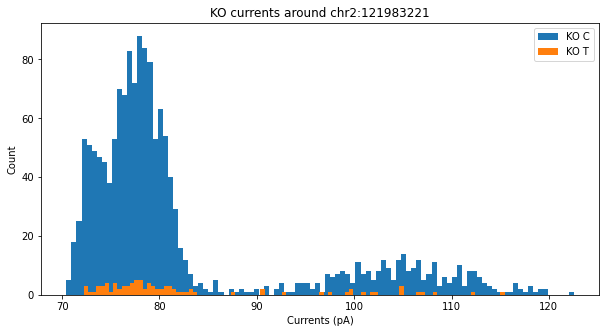

In [8]:
# visualizing KO currents histogram (count)
plt.figure(figsize=(10,5))
plt.hist(df_filt_ko_C.event_level_mean, bins=100, label="KO C")
plt.hist(df_filt_ko_T.event_level_mean, bins=100, label="KO T")
plt.title("KO currents around chr2:121983221")
plt.xlabel("Currents (pA)")
plt.ylabel("Count")
plt.legend(["KO C", "KO T"])
plt.show()

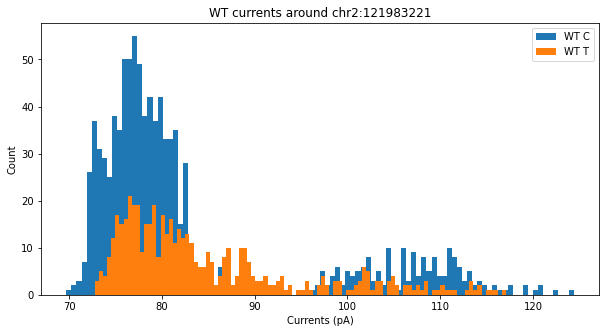

In [9]:
# visualizing WT currents histogram (count)
plt.figure(figsize=(10,5))
plt.hist(df_filt_wt_C.event_level_mean, bins=100, label="WT C")
plt.hist(df_filt_wt_T.event_level_mean, bins=100, label="WT T")
plt.title("WT currents around chr2:121983221")
plt.xlabel("Currents (pA)")
plt.ylabel("Count")
plt.legend()
plt.show()

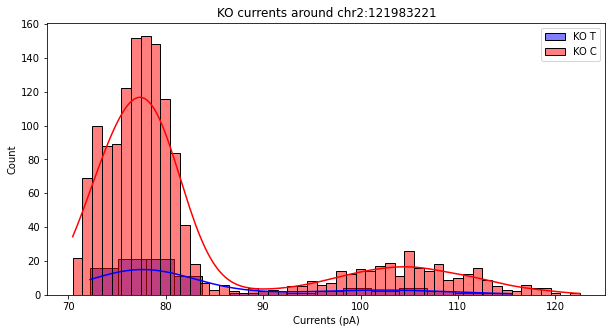

In [10]:
# visualizing KO currents histogram and kde (count)
plt.figure(figsize=(10,5))
sn.histplot(data=df_filt_ko_T, x="event_level_mean", kde=True, color="blue", label="KO T")
sn.histplot(data=df_filt_ko_C, x="event_level_mean", kde=True, color="red", label="KO C")
plt.title("KO currents around chr2:121983221")
plt.xlabel("Currents (pA)")
plt.ylabel("Count")
plt.legend()
plt.show()

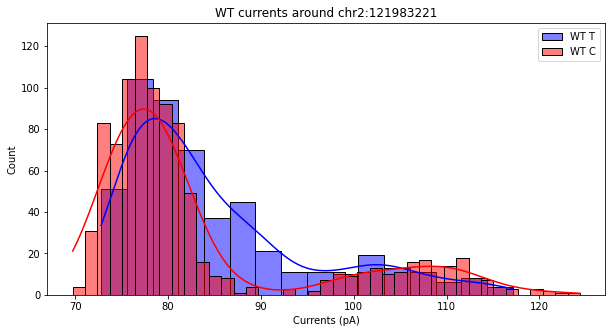

In [11]:
# visualizing WT currents histogram and kde (count)
plt.figure(figsize=(10,5))
sn.histplot(data=df_filt_wt_T, x="event_level_mean", kde=True, color="blue", label="WT T")
sn.histplot(data=df_filt_wt_C, x="event_level_mean", kde=True, color="red", label="WT C")
plt.title("WT currents around chr2:121983221")
plt.xlabel("Currents (pA)")
plt.ylabel("Count")
plt.legend()
plt.show()

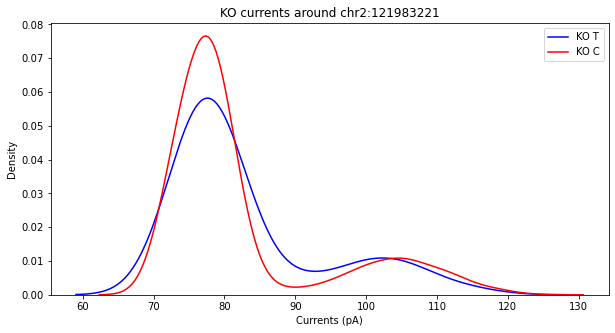

In [12]:
# visualizing KO currents histogram (kde - density)
plt.figure(figsize=(10,5))
sn.kdeplot(data=df_filt_ko_T, x="event_level_mean", color="blue", label="KO T")
sn.kdeplot(data=df_filt_ko_C, x="event_level_mean", color="red", label="KO C")
plt.title("KO currents around chr2:121983221")
plt.xlabel("Currents (pA)")
plt.ylabel("Density")
plt.legend()
plt.show()

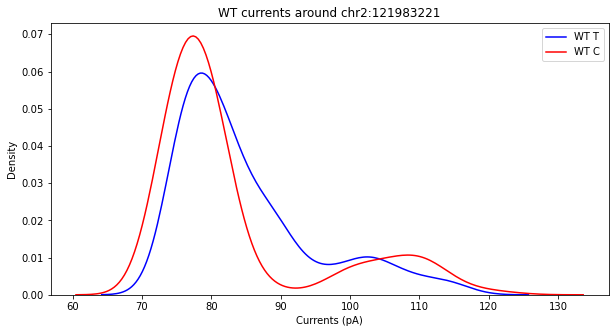

In [13]:
# visualizing WT currents histogram (kde - density)
plt.figure(figsize=(10,5))
sn.kdeplot(data=df_filt_wt_T, x="event_level_mean", color="blue", label="WT T")
sn.kdeplot(data=df_filt_wt_C, x="event_level_mean", color="red", label="WT C")
plt.title("WT currents around chr2:121983221")
plt.xlabel("Currents (pA)")
plt.ylabel("Density")
plt.legend()
plt.show()

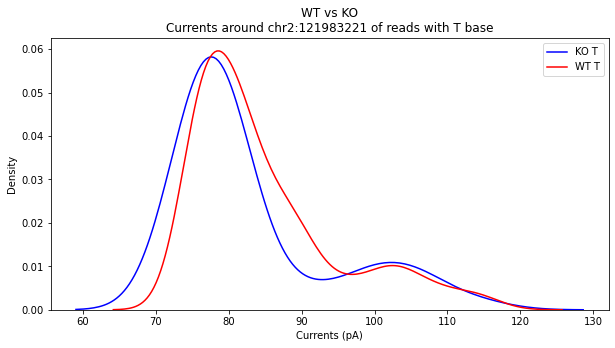

In [14]:
# visualizing WT vs KO currents of reads with T on requested position histogram (kde - density)
plt.figure(figsize=(10,5))
sn.kdeplot(data=df_filt_ko_T, x="event_level_mean", color="blue", label="KO T")
sn.kdeplot(data=df_filt_wt_T, x="event_level_mean", color="red", label="WT T")
plt.title("WT vs KO\nCurrents around chr2:121983221 of reads with T base")
plt.xlabel("Currents (pA)")
plt.ylabel("Density")
plt.legend()
plt.show()

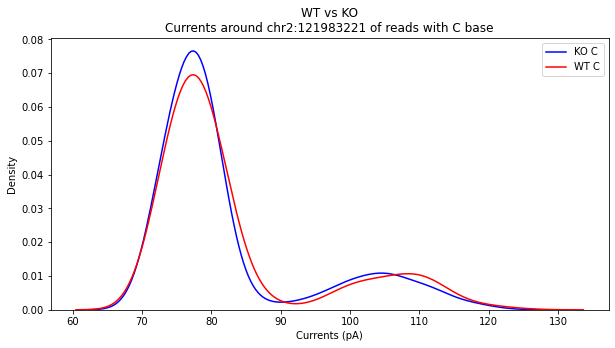

In [15]:
# visualizing WT vs KO currents of reads with C on requested position histogram (kde - density)
plt.figure(figsize=(10,5))
sn.kdeplot(data=df_filt_ko_C, x="event_level_mean", color="blue", label="KO C")
sn.kdeplot(data=df_filt_wt_C, x="event_level_mean", color="red", label="WT C")
plt.title("WT vs KO\nCurrents around chr2:121983221 of reads with C base")
plt.xlabel("Currents (pA)")
plt.ylabel("Density")
plt.legend()
plt.show()

From these graphs, even though only focusing on the chr2:121983221 position, at the moment we might hypothesize that in the WT samples there is a difference stronger between the currents mapping on that site coming from the reads basecalling a C or T. In particular a slight shift toward higher values has been seen on WT currents of reads mapping the position and calling a T with respect KO currents retrieve in the same manner. The mismatch CtoT in the KO are less evident at currents levels even if guppy basecalled some of these as T (U). 